# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [130]:
#import dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import requests
import json
from citipy import citipy
from pprint import pprint
import os

#import API keys
from api_keys import g_key, weather_api_key

#set pandas display format to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

outputFilePath = os.path.join("Output-Data")

## Generate Cities List

In [131]:
#(latitude, longitude)
#latitude (-90,90) degrees South --> North
#longitude (-180,180) degrees West --> East

#increase the size from 100 to much larger once done checking this step
lng = np.random.uniform(-180,180,1500)
lat = np.random.uniform(-90,90,1500)

citiesCreate_df = pd.DataFrame({"Latitude":lat,
                          "Longitude":lng})
citiesCreate_df

,Latitude,Longitude
0,-80,20
1,21,-79
2,-20,-20
3,34,-147
4,-19,-38
...,...,...
1495,42,178
1496,20,-132
1497,-21,-172
1498,56,145


In [132]:
#create empty lists
city = []
country = []

for i in range(0,len(citiesCreate_df['Latitude'])):
    #find nearest city
    city_current = citipy.nearest_city(citiesCreate_df.iloc[i]['Latitude'],citiesCreate_df.iloc[i]['Longitude']).city_name
    city.append(city_current)
    #find country of city
    country_current = citipy.nearest_city(citiesCreate_df.iloc[i]['Latitude'],citiesCreate_df.iloc[i]['Longitude']).country_code
    country.append(country_current)

#add them to the cities_df
citiesCreate_df['City'] = city
citiesCreate_df['Country'] = country
citiesCreate_df

,Latitude,Longitude,City,Country
0,-80,20,bredasdorp,za
1,21,-79,santa cruz del sur,cu
2,-20,-20,georgetown,sh
3,34,-147,kahului,us
4,-19,-38,conceicao da barra,br
...,...,...,...,...
1495,42,178,nikolskoye,ru
1496,20,-132,lompoc,us
1497,-21,-172,alofi,nu
1498,56,145,okha,ru


In [133]:
#remove duplicates
cities_df = citiesCreate_df.drop_duplicates("City", keep="first")
cities_df

,Latitude,Longitude,City,Country
0,-80,20,bredasdorp,za
1,21,-79,santa cruz del sur,cu
2,-20,-20,georgetown,sh
3,34,-147,kahului,us
4,-19,-38,conceicao da barra,br
...,...,...,...,...
1492,73,17,tromso,no
1493,46,112,ondorhaan,mn
1496,20,-132,lompoc,us
1497,-21,-172,alofi,nu


In [134]:
#reindex the list
cities_df = cities_df.reset_index(drop=True)

#new length
len(cities_df)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [136]:
#weather api information
# api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url_currentWeather = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

maxTemp = []
humidity = []
windSpeed = []
cloudiness = []
infoDate = []

#loop through the cities_df to retrieve the weather information
for index, row in cities_df.iterrows():
    currentCity = row["City"]
    currentCountry = row["Country"]
    query_url = f"{url_currentWeather}q={currentCity},{currentCountry}&units={units}&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    try:
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        infoDate.append(response["dt"])
        print(f"Processeing Record | {currentCity}")
    except:
        maxTemp.append(np.nan)
        humidity.append(np.nan)
        windSpeed.append(np.nan)
        cloudiness.append(np.nan)
        infoDate.append(np.nan)
        print(f"City not found. Skipping {currentCity}...")

#add new information into the cities_df
cities_df["Max Temp"] = maxTemp
cities_df["Humidity"] = humidity
cities_df["Wind Speed"] = windSpeed
cities_df["Cloudiness"] = cloudiness
cities_df["Date"] = infoDate

Processeing Record | bredasdorp
Processeing Record | santa cruz del sur
Processeing Record | georgetown
Processeing Record | kahului
Processeing Record | conceicao da barra
Processeing Record | hermanus
City not found. Skipping attawapiskat...
Processeing Record | yellowknife
Processeing Record | torbay
Processeing Record | atuona
Processeing Record | bluff
Processeing Record | mahebourg
Processeing Record | kalmunai
Processeing Record | sidi ali
Processeing Record | zhuhai
City not found. Skipping mataura...
Processeing Record | kalabo
Processeing Record | rikitea
Processeing Record | saskylakh
Processeing Record | castro
Processeing Record | ushuaia
Processeing Record | cape town
Processeing Record | albany
Processeing Record | kapaa
Processeing Record | punta arenas
Processeing Record | qaanaaq
Processeing Record | vaini
Processeing Record | santarem
Processeing Record | mahanoro
City not found. Skipping artyk...
Processeing Record | anadyr
Processeing Record | necochea
City not fou

Processeing Record | meulaboh
Processeing Record | soe
Processeing Record | bathsheba
Processeing Record | lucea
Processeing Record | karpathos
Processeing Record | healdsburg
Processeing Record | toora-khem
Processeing Record | acapulco
Processeing Record | ayan
City not found. Skipping sentyabrskiy...
Processeing Record | omboue
City not found. Skipping asau...
Processeing Record | arauco
Processeing Record | broome
City not found. Skipping krasnoarmeysk...
Processeing Record | saint george
Processeing Record | onega
Processeing Record | hovd
Processeing Record | isla mujeres
Processeing Record | krasnyy luch
Processeing Record | gazimurskiy zavod
Processeing Record | maniitsoq
Processeing Record | vila velha
Processeing Record | vila franca do campo
Processeing Record | paka
Processeing Record | victoria
Processeing Record | balikpapan
Processeing Record | nouadhibou
Processeing Record | guerrero negro
Processeing Record | galesong
Processeing Record | axim
Processeing Record | polu

City not found. Skipping rungata...
Processeing Record | tarata
Processeing Record | wairoa
Processeing Record | kandi
Processeing Record | ancud
Processeing Record | farafangana
Processeing Record | reitz
Processeing Record | neiafu
Processeing Record | victor harbor
Processeing Record | ngunguru
Processeing Record | puerto madero
City not found. Skipping malwan...
Processeing Record | rio gallegos
Processeing Record | ayorou
Processeing Record | dauriya
City not found. Skipping nizhneyansk...
City not found. Skipping arkhangelos...
Processeing Record | lavrentiya
Processeing Record | acarau
Processeing Record | takaka
City not found. Skipping viligili...
Processeing Record | oussouye
City not found. Skipping meyungs...
Processeing Record | porto novo
Processeing Record | crotone
Processeing Record | marmande
Processeing Record | hefei
Processeing Record | madarounfa
Processeing Record | amet
Processeing Record | ocho rios
Processeing Record | mogadishu
Processeing Record | cherskiy
P

In [137]:
cities_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-80,20,bredasdorp,za,45,87,6,24,1601180198
1,21,-79,santa cruz del sur,cu,79,84,10,0,1601180198
2,-20,-20,georgetown,sh,73,77,17,100,1601180199
3,34,-147,kahului,us,84,54,21,40,1601180013
4,-19,-38,conceicao da barra,br,71,87,6,0,1601180180
...,...,...,...,...,...,...,...,...,...
632,73,17,tromso,no,36,79,8,0,1601180397
633,46,112,ondorhaan,mn,nan,nan,nan,nan,nan
634,20,-132,lompoc,us,63,82,8,1,1601180140
635,-21,-172,alofi,nu,75,78,17,75,1601180397


In [140]:
#clean data to remove cities that have missing data & reset index
weather_df = cities_df.dropna().reset_index(drop=True)
weather_df


,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-80,20,bredasdorp,za,45,87,6,24,1601180198
1,21,-79,santa cruz del sur,cu,79,84,10,0,1601180198
2,-20,-20,georgetown,sh,73,77,17,100,1601180199
3,34,-147,kahului,us,84,54,21,40,1601180013
4,-19,-38,conceicao da barra,br,71,87,6,0,1601180180
...,...,...,...,...,...,...,...,...,...
560,31,-73,marsh harbour,bs,82,77,8,0,1601180396
561,73,17,tromso,no,36,79,8,0,1601180397
562,20,-132,lompoc,us,63,82,8,1,1601180140
563,-21,-172,alofi,nu,75,78,17,75,1601180397


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [141]:
weather_df.to_csv(os.path.join(outputFilePath,"weather_cities.csv"),index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [144]:
#drop rows where humidity > 100 & re-index
cleanWeather_df = weather_df.drop(weather_df[weather_df["Humidity"]> 100].index,inplace=False).reset_index(drop=True)
cleanWeather_df

,Latitude,Longitude,City,Country,Max Temp,Humidity,Wind Speed,Cloudiness,Date
0,-80,20,bredasdorp,za,45,87,6,24,1601180198
1,21,-79,santa cruz del sur,cu,79,84,10,0,1601180198
2,-20,-20,georgetown,sh,73,77,17,100,1601180199
3,34,-147,kahului,us,84,54,21,40,1601180013
4,-19,-38,conceicao da barra,br,71,87,6,0,1601180180
...,...,...,...,...,...,...,...,...,...
560,31,-73,marsh harbour,bs,82,77,8,0,1601180396
561,73,17,tromso,no,36,79,8,0,1601180397
562,20,-132,lompoc,us,63,82,8,1,1601180140
563,-21,-172,alofi,nu,75,78,17,75,1601180397


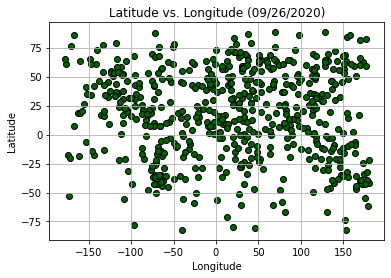

In [194]:
#See the points across the world that we randomly generated
#create the plot
plt.scatter(cleanWeather_df['Longitude'],cleanWeather_df['Latitude'],color='darkgreen',edgecolors='black')

#format axes
plt.title("Latitude vs. Longitude (09/26/2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Latitude_vs_Longitude_DataSet.png"))

#show plot
plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

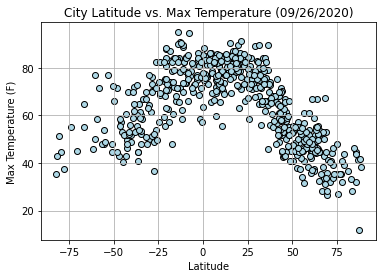

In [152]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Max Temp'],color='lightblue',edgecolors='black')

#format axes
plt.title("City Latitude vs. Max Temperature (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude.png"))

#show plot
plt.show()

In [195]:
#Explanation:
# Based on the chart we can see that closer to the equator (Latitude = 0) max temperature increases.
# Towards the poles, north and south (Latitude = 90 and -90), the max temperature is siginificantly lower.

## Latitude vs. Humidity Plot

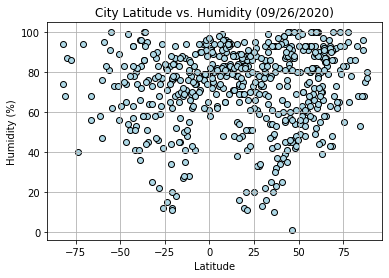

In [159]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Humidity'],color='lightblue',edgecolors='black')

#format axes
plt.title("City Latitude vs. Humidity (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude.png"))

#show plot
plt.show()

In [ ]:
#Explanation:
# The humidity seems to have some range to get lower along latitudes of -25 and 25 ranges.
# Most locations in this dataset have humidities between 60% adn 100% when this data was taken.

## Latitude vs. Cloudiness Plot

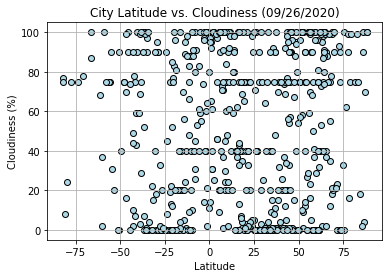

In [160]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Cloudiness'],color='lightblue',edgecolors='black')

#format axes
plt.title("City Latitude vs. Cloudiness (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude.png"))

#show plot
plt.show()

In [ ]:
#Explanation:
# Cloudiness seems to be most consistent around 0%, 40%, ~75%, 100%.
# Areas between approximately latitudes:
#     [-37,-10],[15,67] have higher reported 0-5% clouds
#     [-20,42] have higher reported 40% clouds
#     [5,92] has a consistent line of reported 75% clouds
#     [-10,90] has a consistent line of reported 100% clouds

## Latitude vs. Wind Speed Plot

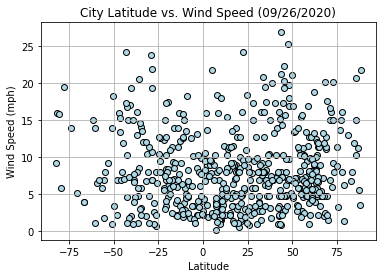

In [161]:
#create the plot
plt.scatter(cleanWeather_df['Latitude'],cleanWeather_df['Wind Speed'],color='lightblue',edgecolors='black')

#format axes
plt.title("City Latitude vs. Wind Speed (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude.png"))

#show plot
plt.show()

In [ ]:
#Explanation:
# Wind speed seems to stay relatively below 10 mph at most data points.
# It looks like it kicks up more between [-50,-25] and [25,50] latitudes.

## Linear Regression

In [157]:
#seperate northern hemisphere and southern hemisphere data points
northernWeather_df = cleanWeather_df.loc[cleanWeather_df["Latitude"]>=0]
southernWeather_df = cleanWeather_df.loc[cleanWeather_df["Latitude"]<=0]

In [158]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(xaxis, yaxis)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

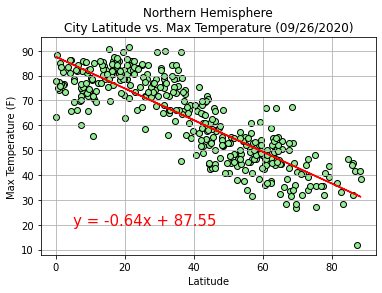

In [162]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Max Temp'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Max Temp'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(5,20),fontsize=15,color="red")
plt.title("Northern Hemisphere\nCity Latitude vs. Max Temperature (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [ ]:
#Explanation
# There is a clear trend in the northern hemisphere that closer to the equator (Latitude = 0) it is much higher max 
# temperature and closer to the north pole (Latitude= 90) is much cooler max temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

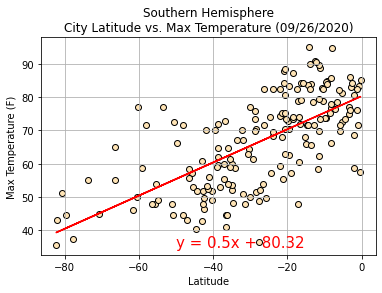

In [168]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Max Temp'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Max Temp'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-50,35),fontsize=15,color="red")
plt.title("Southern Hemisphere\nCity Latitude vs. Max Temperature (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"MaxTemp_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [ ]:
#Explanation
# The same is true for the southern hemisphere. Closer to the equator (Latitude = 0) is higher max temperatures while
# closer to the south pole (Latitude = -90) is colder max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

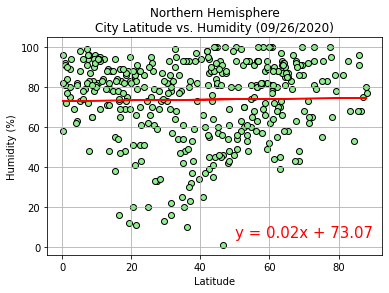

In [174]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Humidity'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Humidity'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(50,5),fontsize=15,color="red")
plt.title("Northern Hemisphere\nCity Latitude vs. Humidity (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [ ]:
#Explanation
# In the northern hemisphere it seems that there is a cosistent trend of humidity being >75% within this dataset and
# ever so slightly increasing towards the pole.
# Between about latitude [20,60] there is more chance of possible lower humidity than right at the equator or pole.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

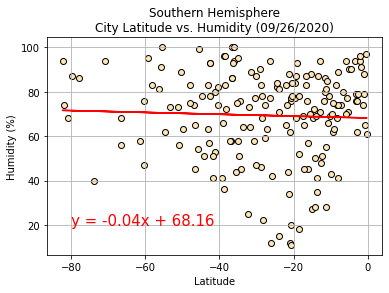

In [175]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Humidity'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Humidity'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-80,20),fontsize=15,color="red")
plt.title("Southern Hemisphere\nCity Latitude vs. Humidity (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Humidity_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [ ]:
#Explanation
# In the southern hemisphere it seems that there is a cosistent trend of humidity being >75% within this dataset and
# ever so slightly increasing towards the poles.
# Between about latitude [-20,-60] there is more chance of possible lower humidity than right at the equator or pole.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

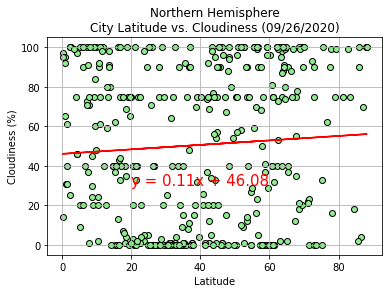

In [178]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Cloudiness'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Cloudiness'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(20,30),fontsize=15,color="red")
plt.title("Northern Hemisphere\nCity Latitude vs. Cloudiness (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [ ]:
#Explanation
# Based on the dataset there is not much trend of cloudiness in the northern hemisphere.
# It slightly increases the farther from the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

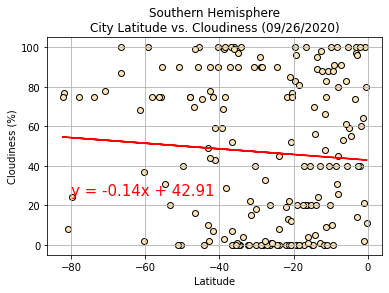

In [182]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Cloudiness'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Cloudiness'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-80,25),fontsize=15,color="red")
plt.title("Southern Hemisphere\nCity Latitude vs. Cloudiness (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"Cloudiness_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [ ]:
#Explanation
# Based on the dataset there is not much trend of cloudiness in the southern hemisphere.
# It slightly increases the farther from the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

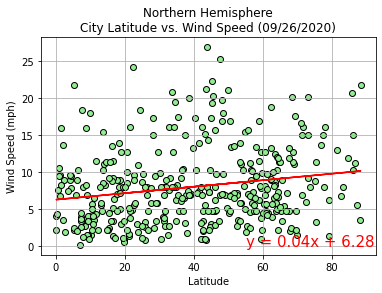

In [188]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northernWeather_df['Latitude'], northernWeather_df['Wind Speed'])
regressValues = northernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(northernWeather_df['Latitude'],northernWeather_df['Wind Speed'],color='lightgreen',edgecolors='black')
plt.plot(northernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(55,0),fontsize=15,color="red")
plt.title("Northern Hemisphere\nCity Latitude vs. Wind Speed (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude_NorthernHemisphere.png"))

#show plot
plt.show()

In [ ]:
#Explanation
# Wind speeds also don't have much of a trend in the northern hemisphere.
# There is a slight increase farther from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

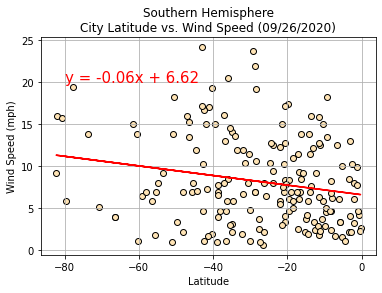

In [191]:
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southernWeather_df['Latitude'], southernWeather_df['Wind Speed'])
regressValues = southernWeather_df['Latitude']*slope+intercept
lineEquation = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))

#create the plot
plt.scatter(southernWeather_df['Latitude'],southernWeather_df['Wind Speed'],color='moccasin',edgecolors='black')
plt.plot(southernWeather_df['Latitude'],regressValues,"r-")

#format axes
plt.annotate(lineEquation,(-80,20),fontsize=15,color="red")
plt.title("Southern Hemisphere\nCity Latitude vs. Wind Speed (09/26/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save figure
plt.savefig(os.path.join(outputFilePath,"WindSpeed_vs_Latitude_SouthernHemisphere.png"))

#show plot
plt.show()

In [196]:
#Explanation
# Wind speeds also don't have much of a trend in the southern hemisphere, though slightly more than the north.
# There is a slight increase farther from the equator.